In [1]:
!pip install tweepy
!pip install textblob
!pip install wordcloud

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import tweepy
from textblob import TextBlob
import string
import nltk

%matplotlib inline
plt.style.use('fivethirtyeight')



In [51]:
#loading the dataset
df=pd.read_csv('Twitter Sentiments.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
#function to remove user handles
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for i in r:
        input_txt=re.sub(i,"",input_txt)
    
    return input_txt
    

In [52]:
#removing user handles from tweets
df['clean_tweet']=np.vectorize(remove_pattern)(df['tweet'],'@[\w]*')
#removing special characters
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df['clean_tweet2'] = df['clean_tweet'].str.replace("[^a-zA-Z]", " ")
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet,clean_tweet2
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...,thanks for lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time,model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society #motivation,factsguide society now motivation


In [53]:
def getsubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity


def getpolarity(tweet):
    return TextBlob(tweet).sentiment.polarity
#subjectivity: if 0 fact if 1 opinion
df['subjectivity']=df['clean_tweet2'].apply(getsubjectivity)
#polarity: -1 negative and +1 posituve
df['polarity']=df['clean_tweet2'].apply(getpolarity)
df.head()

,id,label,tweet,clean_tweet,clean_tweet2,subjectivity,polarity
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...,when a father is dysfunctional and is so sel...,1.0,-0.5
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...,thanks for lyft credit i can t use cause th...,0.2,0.2
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty,0.0,0.0
3,4,0,#model i love u take with u all the time in ...,#model love take with time,model i love u take with u all the time in ...,0.6,0.5
4,5,0,factsguide: society now #motivation,factsguide society #motivation,factsguide society now motivation,0.0,0.0


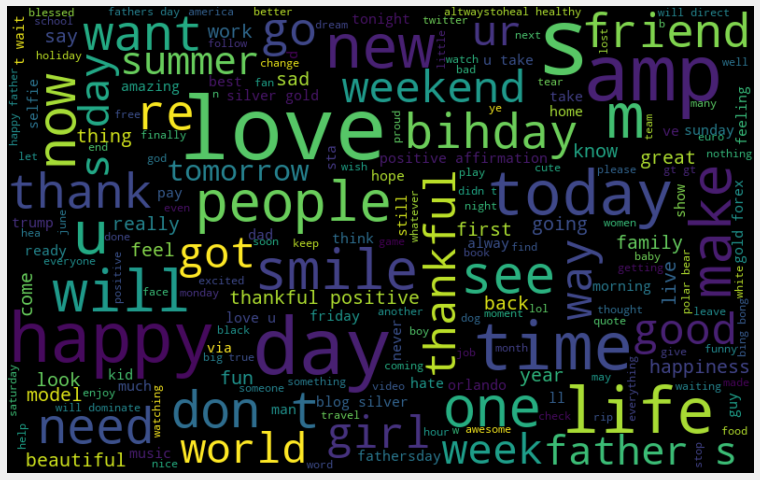

In [55]:
#visualizing the frequent words in the tweet

#combinig all the tweets in single string
all_tweets=" ".join([twt for twt in df['clean_tweet2']])

from wordcloud import WordCloud

words=WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_tweets)

#plotting the graph
plt.figure(figsize=(15,8))
plt.imshow(words, interpolation='bilinear')
plt.axis('off')
plt.show()

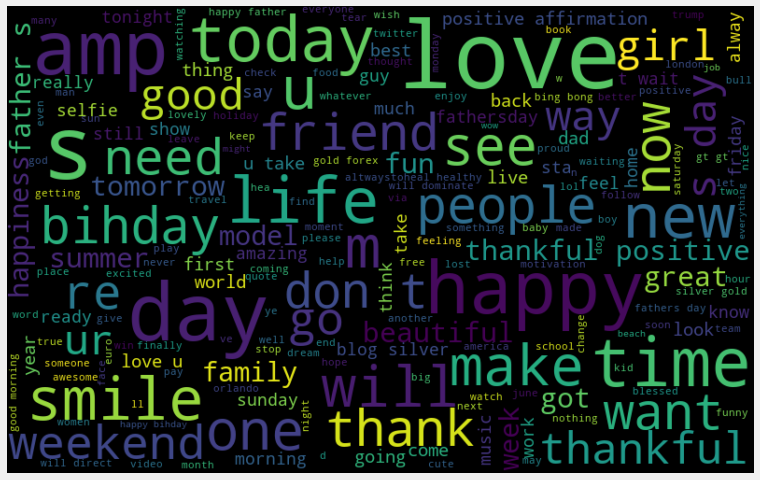

In [24]:
#visualizing the frequent words in the positive and neutral tweets

#combinig all the tweets in single string
all_tweets=" ".join([twt for twt in df['clean_tweet2'][df['polarity']>=0]])

from wordcloud import WordCloud

words=WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_tweets)

#plotting the graph
plt.figure(figsize=(15,8))
plt.imshow(words, interpolation='bilinear')
plt.axis('off')
plt.show()

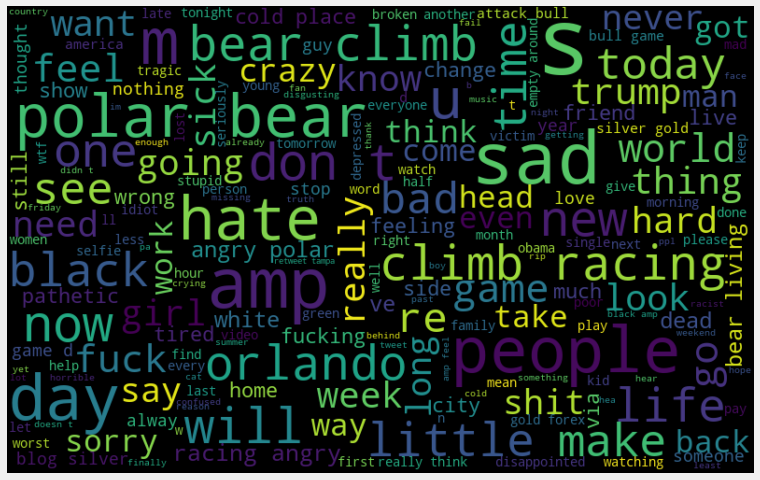

In [56]:
#visualizing the frequent words in the negative tweets

#combinig all the tweets in single string
all_tweets=" ".join([twt for twt in df['clean_tweet2'][df['polarity']<0]])

from wordcloud import WordCloud

words=WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_tweets)

#plotting the graph
plt.figure(figsize=(15,8))
plt.imshow(words, interpolation='bilinear')
plt.axis('off')
plt.show()

In [57]:
def analysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
    
    
df['Analysis']=df['polarity'].apply(analysis)
df.head()

,id,label,tweet,clean_tweet,clean_tweet2,subjectivity,polarity,Analysis
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...,when a father is dysfunctional and is so sel...,1.0,-0.5,Negative
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...,thanks for lyft credit i can t use cause th...,0.2,0.2,Positive
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty,0.0,0.0,Neutral
3,4,0,#model i love u take with u all the time in ...,#model love take with time,model i love u take with u all the time in ...,0.6,0.5,Positive
4,5,0,factsguide: society now #motivation,factsguide society #motivation,factsguide society now motivation,0.0,0.0,Neutral


In [59]:
#extracing hashtags from the tweet

def hashtag(tweets):
    htg=[]
    for tweet in tweets:
        ht=re.findall(r"#(\w+)",tweet)
        htg.append(ht)
    return htg

ht_p=hashtag(df['clean_tweet'][df['polarity']>0])
ht_n=hashtag(df['clean_tweet'][df['polarity']<0])

#unnest list
ht_p=sum(ht_p,[])
ht_n=sum(ht_n,[])
ht_p[:5]

['lyft', 'disapointed', 'getthanked', 'model', 'allshowandnogo']

In [62]:
freq = nltk.FreqDist(ht_p)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,lyft,1
1,disapointed,1
2,getthanked,2
3,model,356
4,allshowandnogo,1


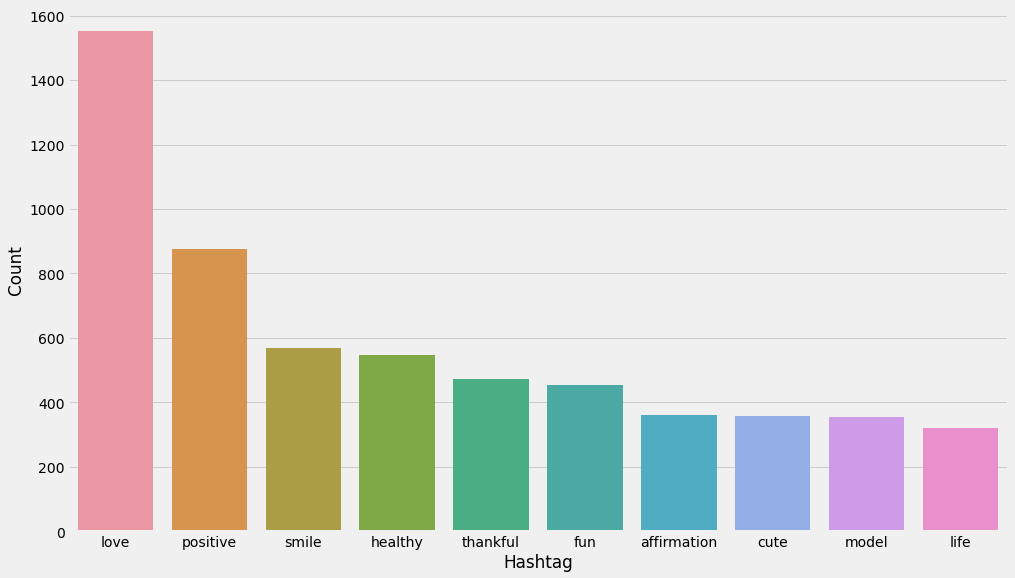

In [11]:
# selecting top 10 hashtags

d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

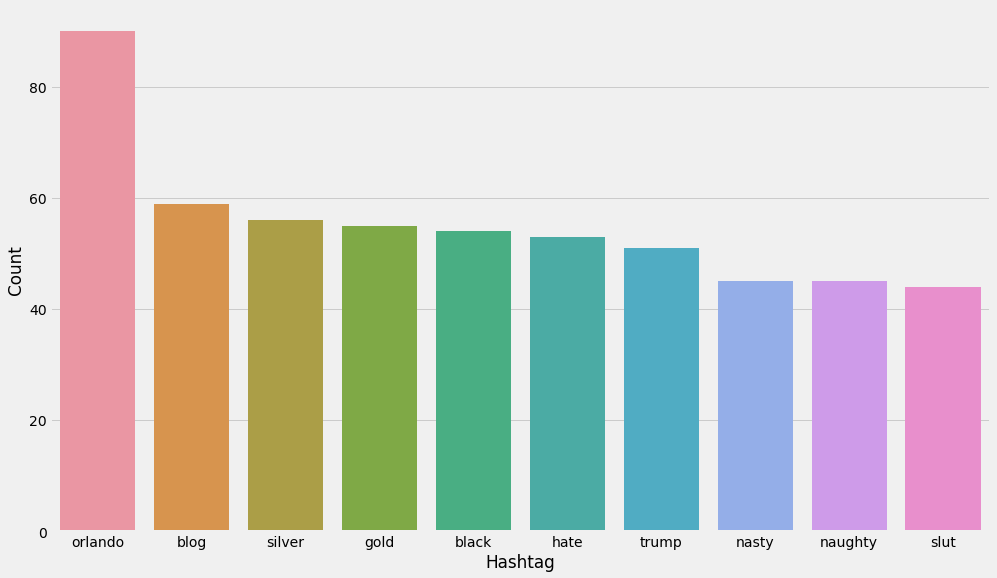

In [12]:
freq = nltk.FreqDist(ht_n)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

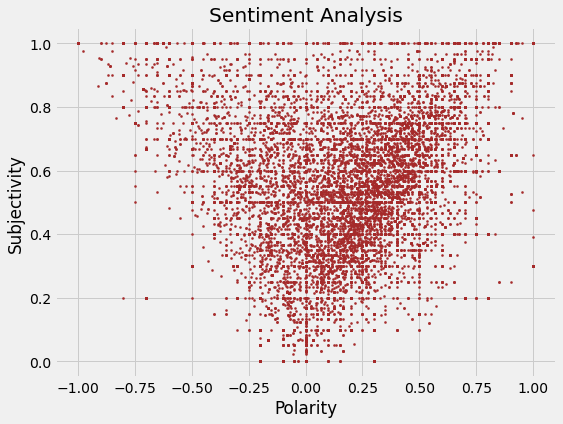

In [43]:
plt.figure(figsize=(8,6))
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity')
plt.title('Sentiment Analysis')
plt.scatter(df["polarity"], df["subjectivity"], color='brown', s=4) 
plt.show()

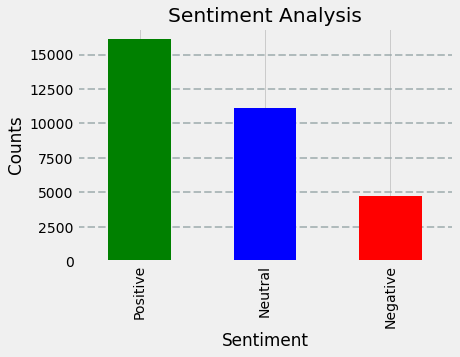

In [35]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar', color=['green','blue','red'])
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

In [28]:
#label 0 denotes non racist or positive tweets and label 1 denotes negative tweets
lab_p=df['tweet'][df['label']==0]
lab_n=df['tweet'][df['label']==1]
ab=100*len(lab_p)/len(df['tweet'])
ab

92.98542018647143

In [16]:
pol_p=df['tweet'][df['polarity']>=0]
pol_n=df['tweet'][df['polarity']<0]
ac=100*len(pol_p)/len(df['tweet'])
ac

85.257493273262

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [47]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [63]:
pred = model.predict(x_test)
f1_score(y_test, pred)

0.4674046740467405

In [64]:
accuracy_score(y_test,pred)

0.9458140407958954